In [178]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', None)
# import the required classes and definitions from Python-MIP
from mip import Model, xsum, maximize, BINARY, INTEGER

In [179]:
raw = pd.read_csv('top500histories', index_col=0)
top500_raw = pd.read_csv('top500.csv')

In [180]:
raw.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'id_', 'web_name', 'team', 'sum_minutes',
       'sum_points', 'next_week_points', 'team_a_conceded_rank',
       'team_a_conceded_rank_next', 'points_per_90'],
      dtype='object')

In [181]:
 df = top500_raw[['id_', 'web_name', 'team', 'element_type', 'assists', 'bonus', 'bps', 'clean_sheets', 
                 'goals_scored', 'minutes', 'saves', 'total_points',
                 'transfers_in', 'transfers_out']]

In [182]:
histories = raw[['id_', 'web_name', 'value', 'assists', 'bonus', 'bps', 'clean_sheets', 'goals_scored', 
                 'minutes', 'round', 'saves', 'selected', 'total_points',
                 'team_a_score', 'team_h_score', 'transfers_in',
                 'transfers_out', 'sum_points', 'sum_minutes', 'team_a_conceded_rank', 'team_a_conceded_rank_next',
                 'points_per_90', 'next_week_points']]

In [183]:
for gameweek in range(1, max(histories['round']) + 1):
    round_points = histories[histories['round'] == gameweek][['id_', 'total_points']]
    df = df.merge(round_points, on='id_', how='left', suffixes=('', '_' + str(gameweek)))
for gameweek in range(1, max(histories['round']) + 1):    
    round_value = histories[histories['round'] == gameweek][['id_', 'value']].rename(columns={'value':'value_' + str(gameweek)})
    df = df.merge(round_value, on='id_', how='left')
for gameweek in range(1, max(histories['round']) + 1):    
    round_minutes = histories[histories['round'] == gameweek][['id_', 'minutes']].rename(columns={'minutes':'minutes_' + str(gameweek)})
    df = df.merge(round_minutes, on='id_', how='left')

In [184]:
df = df.fillna(0)

In [185]:
df.head()

,id_,web_name,team,element_type,assists,bonus,bps,clean_sheets,goals_scored,minutes,saves,total_points,transfers_in,transfers_out,total_points_1,total_points_2,total_points_3,total_points_4,total_points_5,total_points_6,total_points_7,total_points_8,total_points_9,total_points_10,total_points_11,total_points_12,total_points_13,total_points_14,total_points_15,total_points_16,total_points_17,total_points_18,total_points_19,total_points_20,total_points_21,total_points_22,total_points_23,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12,value_13,value_14,value_15,value_16,value_17,value_18,value_19,value_20,value_21,value_22,value_23,minutes_1,minutes_2,minutes_3,minutes_4,minutes_5,minutes_6,minutes_7,minutes_8,minutes_9,minutes_10,minutes_11,minutes_12,minutes_13,minutes_14,minutes_15,minutes_16,minutes_17,minutes_18,minutes_19,minutes_20,minutes_21,minutes_22,minutes_23
0,215,De Bruyne,11,3,16,19,622,9,7,1800,0,152,4636518,2264358,7.0,11.0,5.0,13.0,1.0,17.0,9.0,0.0,3.0,6.0,2.0,2.0,7.0,10.0,3.0,1.0,19.0,4.0,5.0,14.0,2.0,9.0,2,95.0,95.0,96.0,97.0,98.0,98.0,99.0,100.0,100.0,101.0,102.0,102.0,102.0,102.0,102.0,103.0,102.0,103.0,104.0,105.0,106.0,106.0,107,78.0,90.0,90.0,68.0,33.0,90.0,79.0,0.0,90.0,75.0,90.0,90.0,90.0,90.0,79.0,90.0,90.0,90.0,66.0,90.0,90.0,62.0,90
1,166,Vardy,9,4,6,25,546,7,17,1890,0,149,3991271,1264764,2.0,2.0,8.0,16.0,2.0,2.0,12.0,2.0,8.0,20.0,6.0,12.0,12.0,6.0,5.0,13.0,5.0,9.0,2.0,0.0,0.0,5.0,0,90.0,90.0,89.0,89.0,89.0,89.0,89.0,89.0,90.0,91.0,93.0,94.0,96.0,98.0,99.0,100.0,101.0,101.0,101.0,101.0,101.0,100.0,101,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,0.0,0.0,90.0,90
2,192,Mané,10,3,8,18,416,9,11,1745,0,146,3463304,1724088,1.0,13.0,3.0,8.0,15.0,2.0,3.0,12.0,2.0,5.0,12.0,7.0,9.0,2.0,15.0,0.0,6.0,0.0,6.0,11.0,8.0,3.0,3,115.0,115.0,115.0,115.0,115.0,116.0,116.0,116.0,118.0,118.0,119.0,120.0,121.0,122.0,122.0,123.0,123.0,0.0,122.0,122.0,123.0,123.0,124,16.0,90.0,76.0,84.0,90.0,70.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,0.0,90.0,0.0,90.0,90.0,77.0,80.0,82
3,233,Rashford,12,4,5,26,494,4,14,1876,0,134,2961023,2884687,13.0,6.0,0.0,2.0,9.0,2.0,4.0,2.0,9.0,9.0,2.0,5.0,11.0,5.0,13.0,9.0,2.0,2.0,6.0,9.0,2.0,12.0,0,85.0,86.0,87.0,86.0,85.0,85.0,84.0,84.0,84.0,84.0,85.0,85.0,86.0,87.0,87.0,88.0,90.0,91.0,91.0,91.0,91.0,92.0,91,85.0,88.0,90.0,90.0,90.0,60.0,90.0,90.0,83.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,62.0,90.0,90.0,58.0,0
4,191,Salah,10,3,5,15,367,11,11,1619,0,133,1866119,2856413,12.0,3.0,15.0,6.0,9.0,5.0,3.0,2.0,0.0,7.0,2.0,8.0,0.0,3.0,0.0,13.0,16.0,0.0,3.0,3.0,10.0,6.0,7,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,124.0,124.0,124.0,123.0,123.0,122.0,122.0,122.0,122.0,0.0,122.0,123.0,123.0,123.0,123,90.0,78.0,90.0,90.0,90.0,90.0,90.0,90.0,0.0,84.0,64.0,86.0,0.0,68.0,0.0,90.0,90.0,0.0,69.0,90.0,90.0,90.0,90


In [186]:
# position lists

keepers = list(df[df.element_type == 1].index)
defenders = list(df[df.element_type == 2].index)
midfielders = list(df[df.element_type == 3].index)
forwards = list(df[df.element_type == 4].index)

# team lists

ars = list(df[df.team == 1].index)
avl = list(df[df.team == 2].index)
bou = list(df[df.team == 3].index)
bha = list(df[df.team == 4].index)
bur = list(df[df.team == 5].index)
che = list(df[df.team == 6].index)
cry = list(df[df.team == 7].index)
eve = list(df[df.team == 8].index)
lei = list(df[df.team == 9].index)
liv = list(df[df.team == 10].index)
mci = list(df[df.team == 11].index)
mun = list(df[df.team == 12].index)
new = list(df[df.team == 13].index)
nor = list(df[df.team == 14].index)
shu = list(df[df.team == 15].index)
sou = list(df[df.team == 16].index)
tot = list(df[df.team == 17].index)
wat = list(df[df.team == 18].index)
whu = list(df[df.team == 19].index)
wol = list(df[df.team == 20].index)

In [187]:
# The selection models

def team_select(profit, weight, df):

    # define the problem data, change the profit list here
    # profit = 
    # weight = 
    c = 830
    n = len(weight)

    #create an empty maximization
    m = Model('team_select')

    #add the binary decision variables to model m and store their references in a list x
    x = [m.add_var(var_type=BINARY) for i in range(n)]

    #define the objective function of this model 
    m.objective = maximize(xsum(profit[i] * x[i] for i in range(n)))

    #add the capacity constraints
    m += xsum(weight[i] * x[i] for i in range(n)) <= c
    m += xsum(x) <= 11
    m += xsum(df.element_type[i] * x[i] for i in keepers) >= 1 - .1
    m += xsum(df.element_type[i] * x[i] for i in keepers) <= 1 + .1
    m += xsum(df.element_type[i] * x[i] for i in defenders) >= 6 - .1
    m += xsum(df.element_type[i] * x[i] for i in defenders) <= 10 + .1
    m += xsum(df.element_type[i] * x[i] for i in midfielders) >= 6 - .1
    m += xsum(df.element_type[i] * x[i] for i in midfielders) <= 15 + .1
    m += xsum(df.element_type[i] * x[i] for i in forwards) >= 4 - .1
    m += xsum(df.element_type[i] * x[i] for i in forwards) <= 12 + .1

    # max 3 per team

    m += xsum(df.team[i] * x[i] for i in ars) <= 3
    m += xsum(df.team[i] * x[i] for i in avl) <= 6
    m += xsum(df.team[i] * x[i] for i in bou) <= 9
    m += xsum(df.team[i] * x[i] for i in bha) <= 12
    m += xsum(df.team[i] * x[i] for i in bur) <= 15
    m += xsum(df.team[i] * x[i] for i in che) <= 18
    m += xsum(df.team[i] * x[i] for i in cry) <= 21
    m += xsum(df.team[i] * x[i] for i in eve) <= 24
    m += xsum(df.team[i] * x[i] for i in lei) <= 27
    m += xsum(df.team[i] * x[i] for i in liv) <= 30
    m += xsum(df.team[i] * x[i] for i in mci) <= 33
    m += xsum(df.team[i] * x[i] for i in mun) <= 36
    m += xsum(df.team[i] * x[i] for i in new) <= 39
    m += xsum(df.team[i] * x[i] for i in nor) <= 42
    m += xsum(df.team[i] * x[i] for i in shu) <= 45
    m += xsum(df.team[i] * x[i] for i in sou) <= 48
    m += xsum(df.team[i] * x[i] for i in tot) <= 51
    m += xsum(df.team[i] * x[i] for i in wat) <= 54
    m += xsum(df.team[i] * x[i] for i in whu) <= 57
    m += xsum(df.team[i] * x[i] for i in wol) <= 60

    #Optimize the model
    m.optimize()

    # Compute the solution, a list of the selected items
    selected = [i for i in range(n) if x[i].x >= 0.99]
    # print('selected items: {}'.format(selected))
    dream_team = df.iloc[selected,:].sort_values('element_type')
    return dream_team

In [188]:
def bench_select(profit, weight, formation, budget, data):

    # define the problem data, change the profit list here
    # profit = 
    # weight = 
    c = budget
    n = len(weight)

    #create an empty maximization
    m = Model('bench_select')

    #add the binary decision variables to model m and store their references in a list x
    x = [m.add_var(var_type=BINARY) for i in range(n)]

    #define the objective function of this model 
    m.objective = maximize(xsum(profit[i] * x[i] for i in range(n)))

    #add the capacity constraints
    m += xsum(weight[i] * x[i] for i in range(n)) <= c
    m += xsum(x) <= 4.1
    m += xsum(data.element_type[i] * x[i] for i in keepers) >= .9
    m += xsum(data.element_type[i] * x[i] for i in keepers) <= 1.1
    m += xsum(data.element_type[i] * x[i] for i in defenders) >= 2 * formation[1] - .1
    m += xsum(data.element_type[i] * x[i] for i in defenders) <= 2 * formation[1] + .1
    m += xsum(data.element_type[i] * x[i] for i in midfielders) >= 3 * formation[2] - .1
    m += xsum(data.element_type[i] * x[i] for i in midfielders) <= 3 * formation[2] + .1
    m += xsum(data.element_type[i] * x[i] for i in forwards) >= 4 * formation[3] - .1
    m += xsum(data.element_type[i] * x[i] for i in forwards) <= 4 * formation[3] + .1

    # max 3 per team

#     m += xsum(df.team[i] * x[i] for i in ars) <= 3
#     m += xsum(df.team[i] * x[i] for i in avl) <= 6
#     m += xsum(df.team[i] * x[i] for i in bou) <= 9
#     m += xsum(df.team[i] * x[i] for i in bha) <= 12
#     m += xsum(df.team[i] * x[i] for i in bur) <= 15
#     m += xsum(df.team[i] * x[i] for i in che) <= 18
#     m += xsum(df.team[i] * x[i] for i in cry) <= 21
#     m += xsum(df.team[i] * x[i] for i in eve) <= 24
#     m += xsum(df.team[i] * x[i] for i in lei) <= 27
#     m += xsum(df.team[i] * x[i] for i in liv) <= 30
#     m += xsum(df.team[i] * x[i] for i in mci) <= 33
#     m += xsum(df.team[i] * x[i] for i in mun) <= 36
#     m += xsum(df.team[i] * x[i] for i in new) <= 39
#     m += xsum(df.team[i] * x[i] for i in nor) <= 42
#     m += xsum(df.team[i] * x[i] for i in shu) <= 45
#     m += xsum(df.team[i] * x[i] for i in sou) <= 48
#     m += xsum(df.team[i] * x[i] for i in tot) <= 51
#     m += xsum(df.team[i] * x[i] for i in wat) <= 54
#     m += xsum(df.team[i] * x[i] for i in whu) <= 57
#     m += xsum(df.team[i] * x[i] for i in wol) <= 60

    #Optimize the model
    m.optimize()

    # Compute the solution, a list of the selected items
    selected = [i for i in range(n) if x[i].x >= 0.99]
    # print('selected items: {}'.format(selected))
    bench = data.iloc[selected,:].sort_values('element_type')
    return bench

In [189]:
mic = [91, 62, 52, 50, 74,
       71, 53, 50, 32, 77,
       85, 67, 86, 59, 50,
       71, 66, 43, 43, 58,
       61, 82, 42]

In [190]:
cooper = [83, 57, 57, 70, 58, 
          73, 52, 43, 32, 61, 
          74, 80, 58, 51, 55, 
          67, 65, 42, 28, 59, 
          54, 60, 45]

In [191]:
scout = [88, 65, 55, 64, 37, 
         90, 44, 36, 46, 51, 
         41, 87, 78, 56, 62, 
         65, 62, 28, 44, 53, 
         53, 58, 37]

In [192]:
global_ave = [65, 41, 44, 57, 52, 
              52, 51, 36, 37, 49,
              53, 48, 49, 51, 49,
              54, 56, 38, 49, 54,
              48, 57, 44]

In [193]:
top_10k_ave = [0.0, 0.0, 45.3, 54.5, 52.1,
             57.0, 50.8, 38.0, 35.9, 55.7,
             64.6, 65.5, 63.2, 50.3, 58.2,
             62.8, 61.6, 45.0, 53.0, 59.3,
             52.1, 60.1, 44.9]

In [194]:
team_points = pd.DataFrame({'scout':scout, 'mic':mic, 'cooper':cooper, 'top_10k':top_10k_ave, 'overall':global_ave})

In [195]:
team_points

,scout,mic,cooper,top_10k,overall
0,88,91,83,0.0,65
1,65,62,57,0.0,41
2,55,52,57,45.3,44
3,64,50,70,54.5,57
4,37,74,58,52.1,52
5,90,71,73,57.0,52
6,44,53,52,50.8,51
7,36,50,43,38.0,36
8,46,32,32,35.9,37
9,51,77,61,55.7,49


In [196]:
team_points['baseline'] = 0

In [197]:
team_points.head()

,scout,mic,cooper,top_10k,overall,baseline
0,88,91,83,0.0,65,0
1,65,62,57,0.0,41,0
2,55,52,57,45.3,44,0
3,64,50,70,54.5,57,0
4,37,74,58,52.1,52,0


In [198]:
number_of_alerts = 0
okay_formations = [[1, 3, 4, 3],
                   [1, 4, 3, 3],
                   [1, 5, 2, 3],
                   [1, 3, 5, 2],
                   [1, 4, 4, 2],
                   [1, 5, 3, 2],
                   [1, 4, 5, 1],
                   [1, 5, 4, 1]]

In [199]:

for i in range(2, len(team_points.index)):
    dream_team = team_select(df['total_points_'+ str(i)], df['value_'+ str(i)], df)
    next_week_points = dream_team['total_points_' + str(i + 1)]
    next_week_minutes = dream_team['minutes_' + str(i + 1)]
    print(dream_team[['total_points_' + str(i + 1), 'web_name', 'team', 'minutes_' + str(i + 1)]])

    
    dream_team_cost = dream_team['value_' + str(i)].sum()
    print('dream team cost: ', dream_team_cost)
    bench_budget = 1000 - dream_team_cost
    print('bench budget: ', bench_budget)
    bench_pool = df
    bench_pool.loc[(bench_pool['id_'].isin(dream_team['id_'])), 'value_' + str(i)] = 1000


    dream_team_formation = dream_team['element_type'].value_counts().sort_index()
    print(dream_team_formation)
    bench_formation = [1, 5 - dream_team_formation[2], 5 - dream_team_formation[3], 3 - dream_team_formation[4]]
    bench = bench_select(bench_pool['total_points_' + str(i)],
                         bench_pool['value_' + str(i)],
                         bench_formation,
                         bench_budget,
                         bench_pool)
    
#     print(bench[['total_points_' + str(i + 1), 'web_name', 'team', 'minutes_' + str(i + 1)]])
    print('bench cost: ', bench['value_' + str(i)].sum())
    
    
    
    bench_keeper = bench[bench['element_type'] == 1]
    bench_field = bench[bench['element_type'] != 1].sort_values(['total_points_' + str(i)], ascending=False)
    print(bench_field[['total_points_' + str(i), 'total_points_' + str(i + 1), 'web_name', 'team', 'minutes_' + str(i + 1)]])
    
    benched = dream_team[dream_team['minutes_' + str(i + 1)] == 0]
    

    dream_team_played = dream_team[dream_team['minutes_' + str(i + 1)] > 0]
    dream_team_played_formation = dream_team_played['element_type'].value_counts().sort_index()
    dream_team_played_formation_template = pd.Series([0, 0, 0, 0], index=[1, 2, 3, 4])
    for position in dream_team_played_formation.index:
        dream_team_played_formation_template.loc[position] = dream_team_played_formation.loc[position]
    dream_team_played_formation = dream_team_played_formation_template
    print(dream_team_played_formation)   

    
    number_of_benched = benched.shape[0]
    print('num of benched: ', number_of_benched)
    
    bench_points = 0
    
    if benched[benched['element_type'] == 1].shape[0] > 0:
        bench_points = bench_points + int(bench_keeper['total_points_' + str(i + 1)])
        number_of_benched = number_of_benched - 1
    
    
    
    if (dream_team_played_formation.loc[2] >= 3 and
                    dream_team_played_formation.loc[2] <= 5 and
                    dream_team_played_formation.loc[3] >= 2 and
                    dream_team_played_formation.loc[3] <= 5 and
                    dream_team_played_formation.loc[4] >= 1 and
                    dream_team_played_formation.loc[4] <= 5):
        bench_points = bench_points + sum(bench_field['total_points_' + str(i + 1)].iloc[:number_of_benched])
        
    else:
        print('ALERT!!')
        number_of_alerts = number_of_alerts + 1
    
    
#     for id_ in bench_field['id_']:
#         player = bench_field[bench_field['id_'] == id_]
#         if number_of_benched == 0:
#             break
#         else:
#     for j in range(number_of_benched):
                            
#         potential_formation = dream_team_played_formation
#         potential_formation.loc[player['element_type']] = potential_formation.loc[player['element_type']] + 1
                
                
#             if (int(player['minutes_' + str(i + 1)]) > 0 and
#                     potential_formation.loc[2] >= 3 and
#                     potential_formation.loc[2] <= 5 and
#                     potential_formation.loc[3] >= 2 and
#                     potential_formation.loc[3] <= 5 and
#                     potential_formation.loc[4] >= 1 and
#                     potential_formation.loc[4] <= 5):
#                 bench_points = bench_points + int(player['total_points_' + str(i + 1)])
#                 dream_team_played_formation = potential_formation
    
#         number_of_benched = number_of_benched - 1
        
    print('bench points: ', bench_points)

                
 
    
    captain = dream_team['total_points_' + str(i)].idxmax()
    final_points = sum(next_week_points) + dream_team['total_points_' + str(i+1)][captain] + bench_points
    team_points.baseline.loc[i] = final_points
    # adding the 'captain' points based on highest scoring player the previous week
   

     total_points_3   web_name  team  minutes_3
47              3.0   Patrício    20       90.0
18              0.0  Lundstram    15       90.0
37              1.0    Stevens    15       90.0
65              1.0      Digne     8       90.0
0               5.0  De Bruyne    11       90.0
2               3.0       Mané    10       76.0
187             2.0    Bernard     8       61.0
211             2.0     Lamela    17       61.0
272             2.0   Ceballos     1       60.0
14             11.0      Pukki    14       90.0
21              2.0    Firmino    10       85.0
dream team cost:  751.0
bench budget:  249.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  205.0
     total_points_2  total_points_3    web_name  team  minutes_3
373             8.0             0.0  Chicharito    19        0.0
151             7.0             1.0        Mina     8       90.0
56              6.0             1.0   O'Connell    15       90.0
1    1
2    3
3    5
4    2
dtype: int6

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_4     web_name  team  minutes_4
263             5.0         Gunn    16       90.0
128             6.0  van Aanholt     7       90.0
233             2.0       Engels     2       90.0
245             6.0        Matip    10       90.0
246            11.0  Vestergaard    16       90.0
4               6.0        Salah    10       90.0
38             10.0  David Silva    11       77.0
132             0.0      Redmond    16        0.0
8              13.0      Abraham     6       83.0
10             16.0       Agüero    11       90.0
59              8.0       Haller    19       90.0
dream team cost:  777.0
bench budget:  223.0
1    1
2    4
3    3
4    3
Name: element_type, dtype: int64
bench cost:  206.0
     total_points_3  total_points_4 web_name  team  minutes_4
80              9.0             3.0    Noble    19       84.0
166             8.0             8.0    Schär    13       84.0
35              8.0             2.0    Mount     6       90.0
1    1
2    4
3    2
4    3

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_5          web_name  team  minutes_5
170            10.0         Fabianski    19       90.0
5               2.0  Alexander-Arnold    10       90.0
246             5.0       Vestergaard    16       90.0
290             3.0           Masuaku    19       66.0
0               1.0         De Bruyne    11       33.0
15              4.0       Richarlison     8       80.0
57              2.0         Tielemans     9       90.0
248             1.0          Robinson    15        6.0
1               2.0             Vardy     9       90.0
8              14.0           Abraham     6       76.0
10              6.0            Agüero    11       90.0
dream team cost:  788.0
bench budget:  212.0
1    1
2    3
3    4
4    3
Name: element_type, dtype: int64
bench cost:  190.0
     total_points_4  total_points_5 web_name  team  minutes_5
194            10.0             2.0   Hughes    18       62.0
205             8.0            -1.0     Ward     7       90.0
222             8.0          

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



bench cost:  193.0
     total_points_5  total_points_6    web_name  team  minutes_6
308             9.0             0.0       March     4        0.0
114             8.0             1.0    Lindelöf    12       90.0
131             8.0             6.0  Fredericks    19       79.0
1    1
2    3
3    3
4    3
dtype: int64
num of benched:  1
bench points:  0.0


C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_7        web_name  team  minutes_7
50              2.0        Ramsdale     3       90.0
18              2.0       Lundstram    15       90.0
125             7.0       Cresswell    19       90.0
169             1.0        Otamendi    11       90.0
0               9.0       De Bruyne    11       79.0
16              0.0        Maddison     9        0.0
63              1.0  Bernardo Silva    11       10.0
100             8.0          McGinn     2       90.0
157             9.0      Yarmolenko    19       90.0
45              7.0            Wood     5       90.0
140             0.0            Jota    20        0.0
dream team cost:  678.0
bench budget:  322.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  245.0
     total_points_6  total_points_7 web_name  team  minutes_7
27              9.0            13.0  Pereira     9       90.0
21              9.0             2.0  Firmino    10       86.0
144             8.0             0.0  Webster     4   

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_8     web_name  team  minutes_8
47              6.0     Patrício    20       90.0
27              1.0      Pereira     9       90.0
34              0.0        Evans     9       90.0
60              1.0      Doherty    20       22.0
17              1.0       Mahrez    11       59.0
25              8.0      Willian     6       90.0
86              1.0     Jorginho     6       90.0
93              3.0    Wijnaldum    10       77.0
109             0.0  Milivojevic     7        0.0
1               2.0        Vardy     9       90.0
108             2.0         King     3       90.0
dream team cost:  699.0
bench budget:  301.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  208.0
     total_points_7  total_points_8 web_name  team  minutes_8
150             9.0             5.0  Targett     2       90.0
245             9.0             0.0    Matip    10        0.0
7               9.0             7.0     Ings    16       80.0
1    1
2    3
3    4
4    2

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_9           web_name  team  minutes_9
23              2.0             Foster    18       90.0
55              1.0               Dunk     4       90.0
90              2.0            Willems    13       90.0
121             2.0         David Luiz     1       90.0
2               2.0               Mané    10       90.0
24              2.0             Traoré    20       90.0
155             1.0          Hourihane     2       62.0
193             0.0             Milner    10        0.0
306             2.0  Matthew Longstaff    13       90.0
79              2.0             Wesley     2       75.0
204             1.0           Connolly     4       45.0
dream team cost:  623.0
bench budget:  377.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  205.0
     total_points_8  total_points_9   web_name  team  minutes_9
9              10.0             7.0    Jiménez    20       90.0
62              9.0             1.0  Tarkowski     5       90.0
217        

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_10     web_name  team  minutes_10
64               1.0     Pickford     8        90.0
56               2.0    O'Connell    15        90.0
111              1.0       Sidibé     8        90.0
150              1.0      Targett     2        90.0
165              6.0       Alonso     6        62.0
217              6.0      Janmaat    18        90.0
19               1.0     Grealish     2        83.0
38               9.0  David Silva    11        90.0
78               9.0       Barnes     9        71.0
187              1.0      Bernard     8        29.0
3                9.0     Rashford    12        90.0
dream team cost:  645.0
bench budget:  355.0
1    1
2    5
3    4
4    1
Name: element_type, dtype: int64
bench cost:  251.0
    total_points_9  total_points_10  web_name  team  minutes_10
68             9.0              2.0  Doucouré    18        90.0
7              9.0              1.0      Ings    16        45.0
1              8.0             20.0     Vardy     9        

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_11     web_name  team  minutes_11
85               2.0         Krul    14        90.0
58               6.0     Chilwell     9        90.0
137              6.0          Aké     3        90.0
179              1.0    Lascelles    13        90.0
12               1.0     Sterling    11        90.0
25               2.0      Willian     6        90.0
39               3.0        Pérez     9        73.0
76               9.0      Pulisic     6        82.0
109              2.0  Milivojevic     7        90.0
1                6.0        Vardy     9        90.0
3                2.0     Rashford    12        90.0
dream team cost:  756.0
bench budget:  244.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  206.0
     total_points_10  total_points_11   web_name  team  minutes_11
41               9.0              2.0     Maupay     4        90.0
116              8.0              6.0  Fernández    13        90.0
126              8.0              2.0      Jonny  

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



dream team cost:  663.0
bench budget:  337.0
1    1
2    5
3    3
4    2
Name: element_type, dtype: int64
bench cost:  221.0
    total_points_11  total_points_12 web_name  team  minutes_12
42              9.0              2.0    Fleck    15        90.0
88              9.0              2.0  Shelvey    13        90.0
9               9.0              9.0  Jiménez    20        89.0
1    1
2    5
3    3
4    2
dtype: int64
num of benched:  0
bench points:  0


C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_13        web_name  team  minutes_13
23               1.0          Foster    18        90.0
62              17.0       Tarkowski     5        90.0
163              1.0          Tomori     6        90.0
192              1.0           Clark    13        90.0
15               2.0     Richarlison     8        90.0
63               0.0  Bernardo Silva    11         0.0
82               1.0    Harry Wilson     3        45.0
119              2.0           Neves    20        90.0
208              2.0          Davies     8        90.0
1               12.0           Vardy     9        90.0
66               2.0        Deulofeu    18        90.0
dream team cost:  668.0
bench budget:  332.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  209.0
     total_points_12  total_points_13 web_name  team  minutes_13
9                9.0              7.0  Jiménez    20        90.0
22               8.0              1.0  Baldock    15        90.0
303              8.0

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_14    web_name  team  minutes_14
85               1.0        Krul    14        90.0
62               1.0   Tarkowski     5        90.0
177              0.0    Guilbert     2        90.0
184              1.0  Steve Cook     3        90.0
26              10.0         Son    17        87.0
33               8.0    Cantwell    14        82.0
42               1.0       Fleck    15        90.0
155              2.0   Hourihane     2        80.0
1                6.0       Vardy     9        90.0
3                5.0    Rashford    12        90.0
115              2.0   Lacazette     1        90.0
dream team cost:  711.0
bench budget:  289.0
1    1
2    3
3    4
4    3
Name: element_type, dtype: int64
bench cost:  202.0
     total_points_13  total_points_14  web_name  team  minutes_14
48              10.0              2.0  Moutinho    20        90.0
58               8.0              2.0  Chilwell     9        90.0
150              7.0              7.0   Targett     2        90.0

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_15          web_name  team  minutes_15
318              2.0            Martin    19        90.0
5                3.0  Alexander-Arnold    10        82.0
11               1.0          van Dijk    10        90.0
125              0.0         Cresswell    19        90.0
0                3.0         De Bruyne    11        79.0
26               2.0               Son    17        90.0
49               9.0              Alli    17        90.0
53               3.0              Zaha     7        90.0
82               2.0      Harry Wilson     3        90.0
6                2.0        Aubameyang     1        90.0
244              0.0         Iheanacho     9         0.0
dream team cost:  798.0
bench budget:  202.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  199.0
     total_points_14  total_points_15  web_name  team  minutes_15
81               9.0              1.0   Mousset    15        27.0
55               8.0              2.0      Dunk     4      

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_16    web_name  team  minutes_16
32               3.0    Dubravka    13        90.0
34               8.0       Evans     9        90.0
136              1.0        Rico     3        90.0
247              2.0   Manquillo    13        90.0
2                0.0        Mané    10         0.0
16               9.0    Maddison     9        90.0
106              2.0  Dendoncker    20        90.0
199              1.0     Schlupp     7        45.0
3                9.0    Rashford    12        90.0
36               2.0       Jesus    11        90.0
182              0.0       Origi    10         0.0
dream team cost:  719.0
bench budget:  281.0
1    1
2    3
3    4
4    3
Name: element_type, dtype: int64
bench cost:  192.0
     total_points_15  total_points_16  web_name  team  minutes_16
88               9.0              9.0   Shelvey    13        90.0
144              8.0              1.0   Webster     4        90.0
239              8.0              1.0  Bertrand    16        90.0

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_17       web_name  team  minutes_17
43               8.0         Guaita     7        90.0
22               6.0        Baldock    15        90.0
116              2.0      Fernández    13        90.0
176             10.0     Vertonghen    17        90.0
4               16.0          Salah    10        90.0
26               2.0            Son    17        90.0
98               2.0           Pépé     1        90.0
311              0.0          Keita    10         0.0
20               1.0           Kane    17        90.0
52               2.0  Calvert-Lewin     8        90.0
140              2.0           Jota    20        90.0
dream team cost:  790.0
bench budget:  210.0
1    1
2    3
3    4
4    3
Name: element_type, dtype: int64
bench cost:  183.0
     total_points_16  total_points_17 web_name  team  minutes_17
37               9.0              6.0  Stevens    15        90.0
196              9.0              1.0   Tettey    14        90.0
92               8.0            

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_18    web_name  team  minutes_18
50               2.0    Ramsdale     3        90.0
18               6.0   Lundstram    15        90.0
147              0.0       Gomez    10         0.0
176              1.0  Vertonghen    17        73.0
0                4.0   De Bruyne    11        90.0
4                0.0       Salah    10         0.0
12               5.0    Sterling    11        88.0
24               2.0      Traoré    20        90.0
42               0.0       Fleck    15         0.0
14               2.0       Pukki    14        90.0
45               2.0        Wood     5        90.0
dream team cost:  771.0
bench budget:  229.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  209.0
     total_points_17  total_points_18  web_name  team  minutes_18
59               9.0              0.0    Haller    19         0.0
189              8.0              0.0   Pieters     5         0.0
225              8.0              0.0  Balbuena    19         0.0

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_19    web_name  team  minutes_19
30               2.0   Henderson    15        90.0
121              2.0  David Luiz     1        90.0
165              0.0      Alonso     6         0.0
172              2.0    Kabasele    18        90.0
178              6.0    Stephens    16        90.0
25               2.0     Willian     6        83.0
33               2.0    Cantwell    14        90.0
84               2.0     Almirón    13        62.0
124              1.0        Sarr    18        45.0
1                2.0       Vardy     9        90.0
7                1.0        Ings    16        21.0
dream team cost:  653.0
bench budget:  347.0
1    1
2    4
3    4
4    2
Name: element_type, dtype: int64
bench cost:  214.0
     total_points_18  total_points_19   web_name  team  minutes_19
65               9.0              6.0      Digne     8        90.0
174              8.0              1.0   Gündogan    11        23.0
190              8.0              2.0  Rodriguez     5        

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_20          web_name  team  minutes_20
105              2.0            Heaton     2        90.0
5                8.0  Alexander-Arnold    10        90.0
111              2.0            Sidibé     8        90.0
144              0.0           Webster     4         0.0
12               3.0          Sterling    11        87.0
24               1.0            Traoré    20        32.0
28               8.0           Martial    12        88.0
97               2.0           Norwood    15        90.0
9                1.0           Jiménez    20        18.0
21               2.0           Firmino    10        85.0
44               2.0              Ayew     7        90.0
dream team cost:  728.0
bench budget:  272.0
1    1
2    3
3    4
4    3
Name: element_type, dtype: int64
bench cost:  183.0
     total_points_19  total_points_20 web_name  team  minutes_20
191              9.0              2.0   Cédric    16        90.0
103              9.0              1.0  Kouyaté     7         

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_21       web_name  team  minutes_21
170              6.0      Fabianski    19        90.0
55               4.0           Dunk     4        90.0
130              1.0        Maguire    12        90.0
173              2.0        Tomkins     7        90.0
0                2.0      De Bruyne    11        90.0
2                8.0           Mané    10        77.0
39              13.0          Pérez     9        90.0
142              3.0        Fornals    19        90.0
186              2.0           Mooy     4        67.0
52               1.0  Calvert-Lewin     8        90.0
207              1.0         Deeney    18        90.0
dream team cost:  712.0
bench budget:  288.0
1    1
2    3
3    5
4    2
Name: element_type, dtype: int64
bench cost:  208.0
     total_points_20  total_points_21  web_name  team  minutes_21
7                9.0              9.0      Ings    16        75.0
83               8.0              2.0  Cathcart    18        90.0
147              8.0         

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_22     web_name  team  minutes_22
51               2.0         Leno     1        90.0
13               6.0    Robertson    10        90.0
74              12.0  Azpilicueta     6        90.0
145              2.0     Sokratis     1        90.0
178              2.0     Stephens    16        90.0
16               2.0     Maddison     9        90.0
19               1.0     Grealish     2        90.0
39               2.0        Pérez     9        66.0
80               2.0        Noble    19        90.0
36              10.0        Jesus    11        90.0
66               2.0     Deulofeu    18        90.0
dream team cost:  677.0
bench budget:  323.0
1    1
2    4
3    4
4    2
Name: element_type, dtype: int64
bench cost:  202.0
     total_points_21  total_points_22    web_name  team  minutes_22
131             11.0              0.0  Fredericks    19         0.0
33              10.0              2.0    Cantwell    14        90.0
7                9.0              5.0        In

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_23     web_name  team  minutes_23
87                13      Alisson    10          90
65                 2        Digne     8          90
74                 2  Azpilicueta     6          90
206                8        James     6          74
278                2     Williams    12          74
17                 1       Mahrez    11          17
68                 2     Doucouré    18          90
195                5        Praet     9          73
257                1         Mata    12          16
3                  0     Rashford    12           0
10                13       Agüero    11          90
dream team cost:  729.0
bench budget:  271.0
1    1
2    4
3    4
4    2
Name: element_type, dtype: int64
bench cost:  244.0
     total_points_22  total_points_23    web_name  team  minutes_23
106             10.0                2  Dendoncker    20          90
36              10.0                4       Jesus    11          28
37               8.0                3     Steve

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [200]:
team_points

,scout,mic,cooper,top_10k,overall,baseline
0,88,91,83,0.0,65,0.0
1,65,62,57,0.0,41,0.0
2,55,52,57,45.3,44,43.0
3,64,50,70,54.5,57,92.0
4,37,74,58,52.1,52,52.0
5,90,71,73,57.0,52,38.0
6,44,53,52,50.8,51,62.0
7,36,50,43,38.0,36,31.0
8,46,32,32,35.9,37,26.0
9,51,77,61,55.7,49,52.0


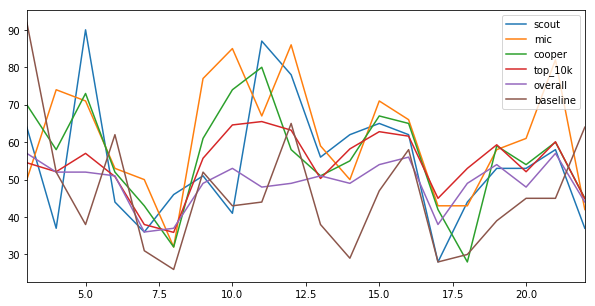

In [201]:
%matplotlib inline
team_points.loc[3:].plot(figsize=(10,5))

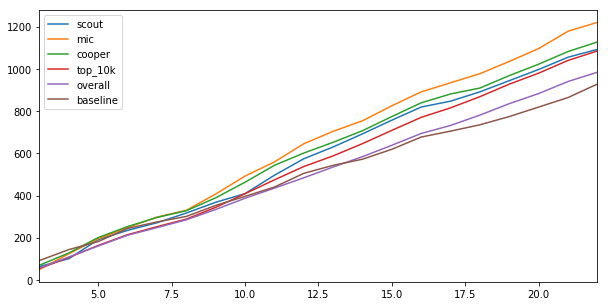

In [202]:
team_points.loc[3:].cumsum().plot(figsize=(10,5))

In [203]:
team_points.loc[3:].sum()

scout       1092.0
mic         1220.0
cooper      1127.0
top_10k     1084.6
overall      984.0
baseline     928.0
dtype: float64

In [204]:
df.head()

,id_,web_name,team,element_type,assists,bonus,bps,clean_sheets,goals_scored,minutes,saves,total_points,transfers_in,transfers_out,total_points_1,total_points_2,total_points_3,total_points_4,total_points_5,total_points_6,total_points_7,total_points_8,total_points_9,total_points_10,total_points_11,total_points_12,total_points_13,total_points_14,total_points_15,total_points_16,total_points_17,total_points_18,total_points_19,total_points_20,total_points_21,total_points_22,total_points_23,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value_10,value_11,value_12,value_13,value_14,value_15,value_16,value_17,value_18,value_19,value_20,value_21,value_22,value_23,minutes_1,minutes_2,minutes_3,minutes_4,minutes_5,minutes_6,minutes_7,minutes_8,minutes_9,minutes_10,minutes_11,minutes_12,minutes_13,minutes_14,minutes_15,minutes_16,minutes_17,minutes_18,minutes_19,minutes_20,minutes_21,minutes_22,minutes_23
0,215,De Bruyne,11,3,16,19,622,9,7,1800,0,152,4636518,2264358,7.0,11.0,5.0,13.0,1.0,17.0,9.0,0.0,3.0,6.0,2.0,2.0,7.0,10.0,3.0,1.0,19.0,4.0,5.0,14.0,2.0,9.0,2,95.0,1000.0,96.0,1000.0,98.0,1000.0,99.0,100.0,100.0,101.0,102.0,102.0,102.0,1000.0,102.0,103.0,1000.0,103.0,104.0,1000.0,106.0,106.0,107,78.0,90.0,90.0,68.0,33.0,90.0,79.0,0.0,90.0,75.0,90.0,90.0,90.0,90.0,79.0,90.0,90.0,90.0,66.0,90.0,90.0,62.0,90
1,166,Vardy,9,4,6,25,546,7,17,1890,0,149,3991271,1264764,2.0,2.0,8.0,16.0,2.0,2.0,12.0,2.0,8.0,20.0,6.0,12.0,12.0,6.0,5.0,13.0,5.0,9.0,2.0,0.0,0.0,5.0,0,90.0,90.0,89.0,1000.0,89.0,89.0,1000.0,89.0,90.0,1000.0,93.0,1000.0,1000.0,98.0,99.0,100.0,101.0,1000.0,101.0,101.0,101.0,100.0,101,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,0.0,0.0,90.0,90
2,192,Mané,10,3,8,18,416,9,11,1745,0,146,3463304,1724088,1.0,13.0,3.0,8.0,15.0,2.0,3.0,12.0,2.0,5.0,12.0,7.0,9.0,2.0,15.0,0.0,6.0,0.0,6.0,11.0,8.0,3.0,3,115.0,1000.0,115.0,115.0,1000.0,116.0,116.0,1000.0,118.0,118.0,1000.0,120.0,121.0,122.0,1000.0,123.0,123.0,0.0,122.0,1000.0,123.0,123.0,124,16.0,90.0,76.0,84.0,90.0,70.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,0.0,90.0,0.0,90.0,90.0,77.0,80.0,82
3,233,Rashford,12,4,5,26,494,4,14,1876,0,134,2961023,2884687,13.0,6.0,0.0,2.0,9.0,2.0,4.0,2.0,9.0,9.0,2.0,5.0,11.0,5.0,13.0,9.0,2.0,2.0,6.0,9.0,2.0,12.0,0,85.0,86.0,87.0,86.0,85.0,85.0,84.0,84.0,1000.0,1000.0,85.0,85.0,1000.0,87.0,1000.0,88.0,90.0,91.0,91.0,91.0,91.0,1000.0,91,85.0,88.0,90.0,90.0,90.0,60.0,90.0,90.0,83.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,62.0,90.0,90.0,58.0,0
4,191,Salah,10,3,5,15,367,11,11,1619,0,133,1866119,2856413,12.0,3.0,15.0,6.0,9.0,5.0,3.0,2.0,0.0,7.0,2.0,8.0,0.0,3.0,0.0,13.0,16.0,0.0,3.0,3.0,10.0,6.0,7,125.0,125.0,1000.0,125.0,125.0,125.0,125.0,125.0,124.0,124.0,124.0,123.0,123.0,122.0,122.0,1000.0,1000.0,0.0,122.0,123.0,123.0,123.0,123,90.0,78.0,90.0,90.0,90.0,90.0,90.0,90.0,0.0,84.0,64.0,86.0,0.0,68.0,0.0,90.0,90.0,0.0,69.0,90.0,90.0,90.0,90


In [205]:
histories.head()

,id_,web_name,value,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,team_a_score,team_h_score,transfers_in,transfers_out,sum_points,sum_minutes,team_a_conceded_rank,team_a_conceded_rank_next,points_per_90,next_week_points
0,215,De Bruyne,95,1,1,37,1,0,78,1,0,868463,7,5,0,0,0,7,78,20,13,8.076923,11
1,215,De Bruyne,95,2,3,44,0,0,90,2,0,995410,11,2,2,81457,79408,18,168,13,14,9.642857,5
2,215,De Bruyne,96,1,0,22,0,0,90,3,0,1566970,5,3,1,510105,49567,23,258,14,15,8.023256,13
3,215,De Bruyne,97,1,2,41,1,1,68,4,0,1914603,13,0,4,373295,80225,36,326,15,20,9.938650,1
4,215,De Bruyne,98,0,0,6,0,0,33,5,0,2386410,1,2,3,438722,38930,37,359,20,20,9.275766,17


In [206]:
def linear_predict(gameweek, data):
    m = ols('next_week_points ~ goals_scored + assists + clean_sheets + saves + value + bps + selected + transfers_in + transfers_out + minutes + points_per_90',  data[data['round'] <= gameweek - 1]).fit()
    next_week = data[data['round'] == gameweek]
    predictions = m.predict(next_week)
    next_week['next_week_predictions'] = predictions   
    return next_week

In [207]:
team_points['linear_points'] = 0

In [208]:
for i in range(2, len(team_points.index)):
    df_linear = linear_predict(i, histories)
    df_copy = df
    df_copy = df_copy.merge(df_linear[['id_', 'next_week_predictions']], how='left', on='id_')
    df_copy = df_copy.fillna(0)
    dream_team = team_select(df_copy.next_week_predictions, df_copy['value_' + str(i)], df_copy)
    next_week_points = dream_team['total_points_' + str(i+1)]
    print(dream_team[['total_points_' + str(i+1), 'web_name', 'minutes_' + str(i + 1)]])
    
    
    
    dream_team_cost = dream_team['value_' + str(i)].sum()
    print('dream team cost: ', dream_team_cost)
    bench_budget = 1000 - dream_team_cost
    print('bench budget: ', bench_budget)
    bench_pool = df_copy
    bench_pool.loc[(bench_pool['id_'].isin(dream_team['id_'])), 'next_week_predictions'] = 0


    dream_team_formation = dream_team['element_type'].value_counts().sort_index()
    bench_formation = [1, 5 - dream_team_formation[2], 5 - dream_team_formation[3], 3 - dream_team_formation[4]]
    bench = bench_select(bench_pool['next_week_predictions'],
                         bench_pool['value_' + str(i)],
                         bench_formation,
                         bench_budget,
                         bench_pool)
    
    print(bench.web_name)
    print('bench cost: ', bench['value_' + str(i)].sum())
    
    
    bench_keeper = bench[bench['element_type'] == 1]
    bench_field = bench[bench['element_type'] != 1].sort_values(['next_week_predictions'], ascending=False)
    print(bench_field[['next_week_predictions', 'total_points_' + str(i + 1), 'web_name', 'team', 'minutes_' + str(i + 1)]])

    
    benched = dream_team[dream_team['minutes_' + str(i + 1)] == 0]
    
    dream_team_played = dream_team[dream_team['minutes_' + str(i + 1)] > 0]
    dream_team_played_formation = dream_team_played['element_type'].value_counts().sort_index()
    dream_team_played_formation_template = pd.Series([0, 0, 0, 0], index=[1, 2, 3, 4])
    for position in dream_team_played_formation.index:
        dream_team_played_formation_template.loc[position] = dream_team_played_formation.loc[position]
    dream_team_played_formation = dream_team_played_formation_template
    print(dream_team_played_formation)  
    
    number_of_benched = benched.shape[0]
    print('num of benched: ', number_of_benched)

    bench_points = 0
    
    if benched[benched['element_type'] == 1].shape[0] > 0:
        bench_points = bench_points + int(bench_keeper['total_points_' + str(i + 1)])
        number_of_benched = number_of_benched - 1
    
    
    
    if (dream_team_played_formation.loc[2] >= 3 and
            dream_team_played_formation.loc[2] <= 5 and
            dream_team_played_formation.loc[3] >= 2 and
            dream_team_played_formation.loc[3] <= 5 and
            dream_team_played_formation.loc[4] >= 1 and
            dream_team_played_formation.loc[4] <= 5):
        bench_points = bench_points + sum(bench_field['total_points_' + str(i + 1)].iloc[:number_of_benched])
        
    else:
        print('ALERT!')
        number_of_alerts = number_of_alerts + 1
    
    
    print('bench points: ', bench_points)
    
    
    
    
    
    
    captain = dream_team['next_week_predictions'].idxmax()
    final_points = sum(next_week_points) + dream_team['total_points_' + str(i+1)][captain] + bench_points
    team_points['linear_points'].loc[i] = final_points

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_3      web_name  minutes_3
304             2.0        Lloris       90.0
134             1.0        Walker       89.0
151             1.0          Mina       90.0
321             1.0   El Mohamady        4.0
12              8.0      Sterling       90.0
28              5.0       Martial       90.0
88              0.0       Shelvey        0.0
113             3.0  Douglas Luiz       90.0
164             1.0       Eriksen       28.0
6               5.0    Aubameyang       90.0
10             13.0        Agüero       90.0
dream team cost:  827.0
bench budget:  173.0
31           Pope
377       Laporte
411     Schelotto
373    Chicharito
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_3    web_name  team  minutes_3
377               3.338710             2.0     Laporte    11       90.0
373               3.198092             0.0  Chicharito    19        0.0
411               0.000000             0.0   Schelotto     4        0.0
1    1

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_4    web_name  minutes_4
23              5.0      Foster       90.0
27              2.0     Pereira       90.0
121             1.0  David Luiz       90.0
377             0.0     Laporte       36.0
12              3.0    Sterling       90.0
26              5.0         Son       78.0
61              8.0       James       90.0
98              5.0        Pépé       90.0
1              16.0       Vardy       90.0
9               5.0     Jiménez       90.0
234             2.0        Gray       81.0
dream team cost:  829.0
bench budget:  171.0
104     Ederson
134      Walker
278    Williams
80        Noble
Name: web_name, dtype: object
bench cost:  171.0
     next_week_predictions  total_points_4  web_name  team  minutes_4
80                3.054216             3.0     Noble    19       84.0
134               2.677818             6.0    Walker    11       90.0
278               0.000000             0.0  Williams    12        0.0
1    1
2    3
3    4
4    3
dtype: int64
num o

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_5     web_name  minutes_5
51              2.0         Leno       90.0
130             6.0      Maguire       90.0
152             6.0  Wan-Bissaka       90.0
166             1.0        Schär       79.0
2              15.0         Mané       90.0
61              2.0        James       90.0
164             2.0      Eriksen       90.0
227             2.0        Iwobi       90.0
6              13.0   Aubameyang       90.0
9               2.0      Jiménez       69.0
20              5.0         Kane       84.0
dream team cost:  828.0
bench budget:  172.0
263          Gunn
137           Aké
370        Garcia
129    Sigurdsson
Name: web_name, dtype: object
bench cost:  172.0
     next_week_predictions  total_points_5    web_name  team  minutes_5
129               4.366847             2.0  Sigurdsson     8       70.0
137               2.586105             2.0         Aké     3       90.0
370               0.000000             0.0      Garcia    11        0.0
1    1
2    3
3   

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_6          web_name  minutes_6
51              2.0              Leno       90.0
5               7.0  Alexander-Arnold       90.0
90              6.0           Willems       81.0
152             1.0       Wan-Bissaka       90.0
4               5.0             Salah       90.0
12              0.0          Sterling        0.0
33              2.0          Cantwell       89.0
35              2.0             Mount       90.0
123             3.0           Rodrigo       90.0
10              9.0            Agüero       90.0
14              2.0             Pukki       90.0
dream team cost:  827.0
bench budget:  173.0
85         Krul
136        Rico
392    Tanganga
3      Rashford
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_6  web_name  team  minutes_6
3                 5.456252             2.0  Rashford    12       60.0
136               2.063259             5.0      Rico     3       90.0
392               0.000000             0.0  

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_7          web_name  minutes_7
51              3.0              Leno       90.0
5               6.0  Alexander-Arnold       90.0
11              8.0          van Dijk       90.0
137             5.0               Aké       90.0
26              5.0               Son       63.0
33              2.0          Cantwell       80.0
35              6.0             Mount       90.0
98              2.0              Pépé       73.0
6               9.0        Aubameyang       90.0
14              2.0             Pukki       90.0
20              8.0              Kane       90.0
dream team cost:  830.0
bench budget:  170.0
47        Patrício
27         Pereira
278       Williams
54     Ward-Prowse
Name: web_name, dtype: object
bench cost:  169.0
     next_week_predictions  total_points_7     web_name  team  minutes_7
27                3.494168            13.0      Pereira     9       90.0
54                3.392641             2.0  Ward-Prowse    16       90.0
278               0.000

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_8    web_name  minutes_8
40              7.0        Ryan       90.0
18              5.0   Lundstram       90.0
65              2.0       Digne       90.0
125             2.0   Cresswell       83.0
0               0.0   De Bruyne        0.0
12              2.0    Sterling       90.0
100             1.0      McGinn       90.0
157             1.0  Yarmolenko       77.0
6               2.0  Aubameyang       90.0
14              1.0       Pukki       83.0
20              2.0        Kane       90.0
dream team cost:  828.0
bench budget:  172.0
104      Ederson
134       Walker
392     Tanganga
127    McTominay
Name: web_name, dtype: object
bench cost:  171.0
     next_week_predictions  total_points_8   web_name  team  minutes_8
134               3.407712             1.0     Walker    11       45.0
127               3.080079             1.0  McTominay    12       90.0
392               0.000000             0.0   Tanganga    17        0.0
1    1
2    3
3    3
4    3
dtype: int

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_9          web_name  minutes_9
29              3.0        Schmeichel       90.0
5               2.0  Alexander-Arnold       90.0
11              2.0          van Dijk       90.0
128             1.0       van Aanholt       90.0
4               0.0             Salah        0.0
12              5.0          Sterling       90.0
35              3.0             Mount       63.0
185             0.0             Kanté        0.0
8               2.0           Abraham       90.0
14              1.0             Pukki       90.0
59              2.0            Haller       90.0
dream team cost:  828.0
bench budget:  172.0
362    McGovern
92        Kelly
136        Rico
33     Cantwell
Name: web_name, dtype: object
bench cost:  172.0
     next_week_predictions  total_points_9  web_name  team  minutes_9
33                2.857684             3.0  Cantwell    14       80.0
92                2.607763             0.0     Kelly     7        0.0
136               2.480054             8.0  

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_10          web_name  minutes_10
329              2.0           Roberto        90.0
5                1.0  Alexander-Arnold        90.0
11               2.0          van Dijk        90.0
144             -1.0           Webster        90.0
0                6.0         De Bruyne        75.0
2                5.0              Mané        90.0
49               2.0              Alli        90.0
57              11.0         Tielemans        90.0
1               20.0             Vardy        90.0
8                5.0           Abraham        69.0
14               2.0             Pukki        90.0
dream team cost:  829.0
bench budget:  171.0
397    Hennessey
13     Robertson
392     Tanganga
68      Doucouré
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_10   web_name  team  minutes_10
13                3.561152              2.0  Robertson    10        90.0
68                3.266073              2.0   Doucouré    18        90.0
392    

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_11    web_name  minutes_11
117              2.0   Gazzaniga        90.0
18              21.0   Lundstram        90.0
121              2.0  David Luiz        90.0
145              2.0    Sokratis        90.0
2               12.0        Mané        90.0
4                2.0       Salah        64.0
26               2.0         Son        78.0
94               2.0   Henderson        90.0
14               2.0       Pukki        90.0
20               0.0        Kane         0.0
41               2.0      Maupay        90.0
dream team cost:  830.0
bench budget:  170.0
263        Gunn
11     van Dijk
442     Lamptey
71       McNeil
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_11  web_name  team  minutes_11
11                3.479895              1.0  van Dijk    10        90.0
71                3.417241              1.0    McNeil     5        58.0
442               0.000000              0.0   Lamptey     6         0.0
1    1
2    3


C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


    total_points_12          web_name  minutes_12
23              9.0            Foster        90.0
5               2.0  Alexander-Arnold        90.0
11              2.0          van Dijk        90.0
13              5.0         Robertson        90.0
65              2.0             Digne        90.0
0               2.0         De Bruyne        90.0
35              3.0             Mount        86.0
76              8.0           Pulisic        79.0
1              12.0             Vardy        90.0
6               2.0        Aubameyang        90.0
14              2.0             Pukki        90.0
dream team cost:  829.0
bench budget:  171.0
70          de Gea
442        Lamptey
54     Ward-Prowse
100         McGinn
Name: web_name, dtype: object
bench cost:  171.0
     next_week_predictions  total_points_12     web_name  team  minutes_12
54                3.291018              2.0  Ward-Prowse    16        90.0
100               3.260492              2.0       McGinn     2        90.0
442  

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_13   web_name  minutes_13
329              2.0    Roberto        90.0
11               2.0   van Dijk        90.0
18               3.0  Lundstram        90.0
55               0.0       Dunk         0.0
2                9.0       Mané        90.0
4                0.0      Salah         0.0
16               3.0   Maddison        90.0
76               2.0    Pulisic        90.0
3               11.0   Rashford        90.0
8                2.0    Abraham        72.0
9                7.0    Jiménez        90.0
dream team cost:  829.0
bench budget:  171.0
40          Ryan
13     Robertson
442      Lamptey
237      Fabinho
Name: web_name, dtype: object
bench cost:  171.0
     next_week_predictions  total_points_13   web_name  team  minutes_13
13                3.785181              6.0  Robertson    10        90.0
237               3.251105              1.0    Fabinho    10        90.0
442               0.000000              0.0    Lamptey     6         0.0
1    1
2    2
3   

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


    total_points_14          web_name  minutes_14
40              2.0              Ryan        90.0
5              10.0  Alexander-Arnold        90.0
18              2.0         Lundstram        90.0
46              2.0           Söyüncü        90.0
0              10.0         De Bruyne        90.0
2               2.0              Mané        90.0
16              2.0          Maddison        90.0
48              2.0          Moutinho        90.0
8               0.0           Abraham         0.0
9               5.0           Jiménez        90.0
20              2.0              Kane        90.0
dream team cost:  830.0
bench budget:  170.0
210      McCarthy
136          Rico
278      Williams
106    Dendoncker
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_14    web_name  team  minutes_14
278               2.695132              0.0    Williams    12        78.0
136               2.572216              0.0        Rico     3        90.0
106         

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


    total_points_15   web_name  minutes_15
40              3.0       Ryan        90.0
18              1.0  Lundstram        90.0
27              7.0    Pereira        90.0
46              5.0    Söyüncü        90.0
2              15.0       Mané        90.0
12              3.0   Sterling        71.0
35              6.0      Mount        90.0
76              2.0    Pulisic        85.0
1               5.0      Vardy        90.0
7               9.0       Ings        76.0
9               2.0    Jiménez        83.0
dream team cost:  830.0
bench budget:  170.0
210    McCarthy
92        Kelly
400      Kilman
33     Cantwell
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_15  web_name  team  minutes_15
33                3.044960              2.0  Cantwell    14        82.0
92                2.633718              6.0     Kelly     7        90.0
400               2.212527              0.0    Kilman    20         0.0
1    1
2    3
3    4
4    3
dtype: int

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


    total_points_16          web_name  minutes_16
40              2.0              Ryan        90.0
5               1.0  Alexander-Arnold        50.0
11              6.0          van Dijk        90.0
18              2.0         Lundstram        90.0
0               1.0         De Bruyne        90.0
26             12.0               Son        90.0
35              2.0             Mount        90.0
49              9.0              Alli        84.0
1              13.0             Vardy        90.0
8               2.0           Abraham        90.0
14              2.0             Pukki        90.0
dream team cost:  829.0
bench budget:  171.0
318      Martin
92        Kelly
144     Webster
33     Cantwell
Name: web_name, dtype: object
bench cost:  171.0
     next_week_predictions  total_points_16  web_name  team  minutes_16
144               2.755783              1.0   Webster     4        90.0
33                2.722953              1.0  Cantwell    14        18.0
92                2.638713

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


     total_points_17   web_name  minutes_17
104              6.0    Ederson        90.0
11               7.0   van Dijk        90.0
18              11.0  Lundstram        90.0
46               3.0    Söyüncü        90.0
0               19.0  De Bruyne        90.0
16               2.0   Maddison        90.0
35               2.0      Mount        90.0
49               2.0       Alli        90.0
1                5.0      Vardy        90.0
3                2.0   Rashford        90.0
8                2.0    Abraham        90.0
dream team cost:  825.0
bench budget:  175.0
210    McCarthy
92        Kelly
102     Ogbonna
196      Tettey
Name: web_name, dtype: object
bench cost:  175.0
     next_week_predictions  total_points_17 web_name  team  minutes_17
92                2.951627              2.0    Kelly     7        90.0
196               2.776675              1.0   Tettey    14        90.0
102               2.683416              6.0  Ogbonna    19        90.0
1    1
2    3
3    4
4    3
dt

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


    total_points_18  web_name  minutes_18
43              2.0    Guaita        90.0
11              0.0  van Dijk         0.0
46              0.0   Söyüncü        90.0
92              2.0     Kelly        90.0
2               0.0      Mané         0.0
16              2.0  Maddison        90.0
26             -1.0       Son        61.0
33             10.0  Cantwell        86.0
1               9.0     Vardy        90.0
3               2.0  Rashford        90.0
8               2.0   Abraham        79.0
dream team cost:  828.0
bench budget:  172.0
64             Pickford
5      Alexander-Arnold
136                Rico
399                Duda
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_18          web_name  team  \
5                 4.107634              0.0  Alexander-Arnold    10   
136               2.679657              1.0              Rico     3   
399               0.000000              0.0              Duda    14   

     minutes_18  
5  

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


     total_points_19    web_name  minutes_19
29               0.0  Schmeichel        90.0
18               2.0   Lundstram        90.0
92               2.0       Kelly        90.0
136              0.0        Rico         0.0
0                5.0   De Bruyne        66.0
12              10.0    Sterling        90.0
16               1.0    Maddison        75.0
19               6.0    Grealish        90.0
3                6.0    Rashford        62.0
9               11.0     Jiménez        90.0
20               8.0        Kane        90.0
dream team cost:  830.0
bench budget:  170.0
23       Foster
65        Digne
225    Balbuena
35        Mount
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_19  web_name  team  minutes_19
35                3.812403              1.0     Mount     6        45.0
65                3.225534              6.0     Digne     8        90.0
225               0.000000              1.0  Balbuena    19        90.0
1    1
2    2


C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

    total_points_20   web_name  minutes_20
31              1.0       Pope        90.0
11              6.0   van Dijk        90.0
13              6.0  Robertson        90.0
18              0.0  Lundstram         0.0
0              14.0  De Bruyne        90.0
19              1.0   Grealish        90.0
33              1.0   Cantwell         4.0
49              2.0       Alli        90.0
1               0.0      Vardy         0.0
8               7.0    Abraham        90.0
20              8.0       Kane        90.0
dream team cost:  827.0
bench budget:  173.0
117     Gazzaniga
92          Kelly
416       Simpson
106    Dendoncker
Name: web_name, dtype: object
bench cost:  173.0
     next_week_predictions  total_points_20    web_name  team  minutes_20
92                3.170940              2.0       Kelly     7        90.0
106               2.570793              1.0  Dendoncker    20        57.0
416               2.333336              0.0     Simpson     3         0.0
1    1
2    2
3    4
4

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


    total_points_21          web_name  minutes_21
32              3.0          Dubravka        90.0
5               6.0  Alexander-Arnold        90.0
11              7.0          van Dijk        90.0
13             12.0         Robertson        87.0
92              2.0             Kelly        82.0
12              1.0          Sterling         1.0
19             13.0          Grealish        90.0
28              2.0           Martial        90.0
3               2.0          Rashford        90.0
7               9.0              Ings        75.0
20              2.0              Kane        74.0
dream team cost:  828.0
bench budget:  172.0
40         Ryan
134      Walker
35        Mount
445    Pussetto
Name: web_name, dtype: object
bench cost:  170.0
     next_week_predictions  total_points_21  web_name  team  minutes_21
35                3.503052              3.0     Mount     6        72.0
134               3.130848              0.0    Walker    11         0.0
445               0.000000

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


    total_points_22          web_name  minutes_22
29              4.0        Schmeichel        90.0
5               6.0  Alexander-Arnold        90.0
11              6.0          van Dijk        90.0
18              6.0         Lundstram        69.0
46              1.0           Söyüncü        90.0
0               9.0         De Bruyne        62.0
2               3.0              Mané        80.0
24              2.0            Traoré        90.0
28              8.0           Martial        79.0
3              12.0          Rashford        58.0
8               6.0           Abraham        90.0
dream team cost:  828.0
bench budget:  172.0
64     Pickford
92        Kelly
399        Duda
9       Jiménez
Name: web_name, dtype: object
bench cost:  172.0
     next_week_predictions  total_points_22 web_name  team  minutes_22
9                 4.018148              2.0  Jiménez    20        90.0
92                2.992099              2.0    Kelly     7        90.0
399               0.000000   

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


    total_points_23          web_name  minutes_23
29                2        Schmeichel          90
5                10  Alexander-Arnold          90
11               15          van Dijk          90
18                2         Lundstram          66
2                 3              Mané          82
15                0       Richarlison           0
16                2          Maddison          90
24               10            Traoré          90
1                 0             Vardy          90
7                 2              Ings          90
8                 2           Abraham          79
dream team cost:  826.0
bench budget:  174.0
117     Gazzaniga
92          Kelly
392      Tanganga
106    Dendoncker
Name: web_name, dtype: object
bench cost:  174.0
     next_week_predictions  total_points_23    web_name  team  minutes_23
92                3.121615                1       Kelly     7          90
106               2.854944                2  Dendoncker    20          90
392         

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


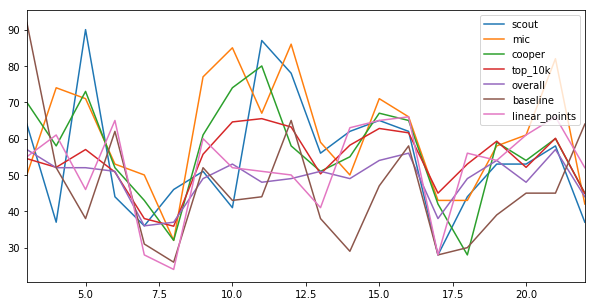

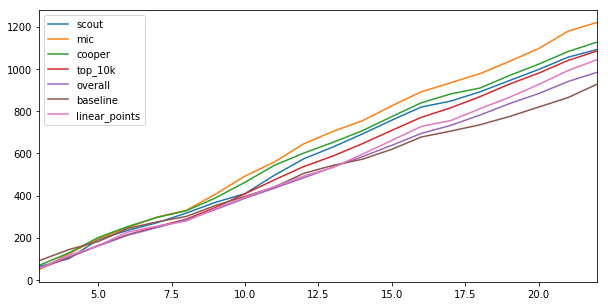

In [209]:
%matplotlib inline
team_points.loc[3:].sum()
team_points.loc[3:].plot(figsize=(10,5))
team_points.loc[3:].cumsum().plot(figsize=(10,5))

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
team_points.shape

(23, 7)

In [212]:
histories.head()

,id_,web_name,value,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,team_a_score,team_h_score,transfers_in,transfers_out,sum_points,sum_minutes,team_a_conceded_rank,team_a_conceded_rank_next,points_per_90,next_week_points
0,215,De Bruyne,95,1,1,37,1,0,78,1,0,868463,7,5,0,0,0,7,78,20,13,8.076923,11
1,215,De Bruyne,95,2,3,44,0,0,90,2,0,995410,11,2,2,81457,79408,18,168,13,14,9.642857,5
2,215,De Bruyne,96,1,0,22,0,0,90,3,0,1566970,5,3,1,510105,49567,23,258,14,15,8.023256,13
3,215,De Bruyne,97,1,2,41,1,1,68,4,0,1914603,13,0,4,373295,80225,36,326,15,20,9.938650,1
4,215,De Bruyne,98,0,0,6,0,0,33,5,0,2386410,1,2,3,438722,38930,37,359,20,20,9.275766,17


In [213]:
df_forest = histories[['id_', 'assists', 'bonus', 'bps', 'clean_sheets', 'goals_scored', 
                 'minutes', 'round', 'saves', 'selected', 
                 'total_points',
                 'transfers_in', 
                 'team_a_conceded_rank', 'team_a_conceded_rank_next',
                 'transfers_out',
                 'points_per_90', 'next_week_points']].sort_values('round')

In [214]:
df_forest.head()

,id_,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,transfers_in,team_a_conceded_rank,team_a_conceded_rank_next,transfers_out,points_per_90,next_week_points
0,215,1,1,37,1,0,78,1,0,868463,7,0,20,13,0,8.076923,11
3752,343,0,0,10,0,0,26,1,0,370921,1,0,16,9,0,3.461538,2
1626,97,0,0,15,1,0,83,1,0,23782,3,0,16,2,0,3.253012,5
8099,279,0,0,0,0,0,0,1,0,4400,0,0,10,15,0,0.000000,0
6965,452,0,0,0,0,0,0,1,0,4111,0,0,10,9,0,0.000000,0


In [268]:
def forest_predict(gameweek):
    df_clean = df_forest.drop('id_', axis=1)
    df_clean = df_clean[df_clean['round'] <= gameweek - 1]
    X_train = df_clean.drop('next_week_points', axis=1)
    y_train = df_clean.next_week_points
    rfr = RandomForestRegressor(n_estimators=140, max_depth=5)
    rfr.fit(X_train, y_train)
    next_week = df_forest[df_forest['round'] == gameweek]
    X_test = next_week.drop(['id_', 'next_week_points'], axis=1)
    y_pred = rfr.predict(X_test)
    next_week['forest_predictions'] = y_pred
    return next_week
    
    
    

In [269]:
forest_predict(2).head()

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,id_,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,transfers_in,team_a_conceded_rank,team_a_conceded_rank_next,transfers_out,points_per_90,next_week_points,forest_predictions
9373,365,0,0,0,0,0,0,2,0,50128,0,3828,1,18,7634,6.000000,0,1.455572
7734,288,0,0,22,0,0,90,2,0,19117,2,1899,15,18,1788,1.475410,2,2.553120
7321,22,0,3,34,0,0,90,2,0,120473,4,6905,9,1,12473,2.500000,1,3.508586
4532,476,0,0,0,0,0,45,2,0,11943,0,2633,17,5,1489,1.333333,2,2.038636
5308,528,0,0,1,0,0,4,2,0,979,1,353,2,5,92,22.500000,1,0.688542


In [270]:
team_points['forest_points'] = 0

In [271]:
for i in range(2, len(team_points.index)):
    df_forest_predictions = forest_predict(i)
    df_copy = df
    df_copy = df_copy.merge(df_forest_predictions[['id_', 'forest_predictions']], how='left', on='id_')
    df_copy = df_copy.fillna(0)
    dream_team = team_select(df_copy.forest_predictions, df_copy['value_' + str(i)], df_copy)
    next_week_points = dream_team['total_points_' + str(i+1)]
    print(dream_team[['total_points_' + str(i+1), 'web_name', 'minutes_' + str(i + 1)]])
    
    dream_team_cost = dream_team['value_' + str(i)].sum()
    print('dream team cost: ', dream_team_cost)
    bench_budget = 1000 - dream_team_cost
    print('bench budget: ', bench_budget)
    bench_pool = df_copy
    bench_pool.loc[(bench_pool['id_'].isin(dream_team['id_'])), 'forest_predictions'] = 0


    dream_team_formation = dream_team['element_type'].value_counts().sort_index()
    bench_formation = [1, 5 - dream_team_formation[2], 5 - dream_team_formation[3], 3 - dream_team_formation[4]]
    bench = bench_select(bench_pool['forest_predictions'],
                         bench_pool['value_' + str(i)],
                         bench_formation,
                         bench_budget,
                         bench_pool)
    
    print(bench.web_name)
    print('bench cost: ', bench['value_' + str(i)].sum())
    
    
    bench_keeper = bench[bench['element_type'] == 1]
    bench_field = bench[bench['element_type'] != 1].sort_values(['forest_predictions'], ascending=False)
    print(bench_field[['forest_predictions', 'total_points_' + str(i + 1), 'web_name', 'team', 'minutes_' + str(i + 1)]])

    
    benched = dream_team[dream_team['minutes_' + str(i + 1)] == 0]
    
    dream_team_played = dream_team[dream_team['minutes_' + str(i + 1)] > 0]
    dream_team_played_formation = dream_team_played['element_type'].value_counts().sort_index()
    dream_team_played_formation_template = pd.Series([0, 0, 0, 0], index=[1, 2, 3, 4])
    for position in dream_team_played_formation.index:
        dream_team_played_formation_template.loc[position] = dream_team_played_formation.loc[position]
    dream_team_played_formation = dream_team_played_formation_template
    print(dream_team_played_formation)
    
    number_of_benched = benched.shape[0]
    print('num of benched: ', number_of_benched)

    bench_points = 0
    
        
    if benched[benched['element_type'] == 1].shape[0] > 0:
        bench_points = bench_points + int(bench_keeper['total_points_' + str(i + 1)])
        number_of_benched = number_of_benched - 1
    
    
    
    if (dream_team_played_formation.loc[2] >= 3 and
                    dream_team_played_formation.loc[2] <= 5 and
                    dream_team_played_formation.loc[3] >= 2 and
                    dream_team_played_formation.loc[3] <= 5 and
                    dream_team_played_formation.loc[4] >= 1 and
                    dream_team_played_formation.loc[4] <= 5):
        bench_points = bench_points + sum(bench_field['total_points_' + str(i + 1)].iloc[:number_of_benched])
        
    else:
        print('ALERT!')
        number_of_alerts = number_of_alerts + 1

    
    print('bench points: ', bench_points)

    
    
    
    
    captain = dream_team['forest_predictions'].idxmax()
    final_points = sum(next_week_points) + dream_team['total_points_' + str(i+1)][captain] + bench_points
    team_points['forest_points'].loc[i] = final_points

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_3     web_name  minutes_3
70              1.0       de Gea       90.0
55              1.0         Dunk       90.0
92              2.0        Kelly       90.0
321             1.0  El Mohamady        4.0
28              5.0      Martial       90.0
89              2.0     Trossard       90.0
99              2.0  Lucas Moura       90.0
119             2.0        Neves       90.0
3               0.0     Rashford       90.0
6               5.0   Aubameyang       90.0
373             0.0   Chicharito        0.0
dream team cost:  708.0
bench budget:  292.0
104        Ederson
34           Evans
152    Wan-Bissaka
107           Groß
Name: web_name, dtype: object
bench cost:  231.0
     forest_predictions  total_points_3     web_name  team  minutes_3
107            4.235885             1.0         Groß     4       12.0
152            3.923894             0.0  Wan-Bissaka    12       90.0
34             3.420752             2.0        Evans     9       90.0
1    1
2    3
3    4
4

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_4     web_name  minutes_4
29              2.0   Schmeichel       90.0
11              7.0     van Dijk       90.0
13              6.0    Robertson       90.0
152             2.0  Wan-Bissaka       90.0
12              3.0     Sterling       90.0
53              3.0         Zaha       90.0
129             5.0   Sigurdsson       90.0
368             0.0        Pedro        0.0
1              16.0        Vardy       90.0
14              2.0        Pukki       90.0
101             2.0       Barnes       72.0
dream team cost:  804.0
bench budget:  196.0
105      Heaton
58     Chilwell
137         Aké
33     Cantwell
Name: web_name, dtype: object
bench cost:  196.0
     forest_predictions  total_points_4  web_name  team  minutes_4
33             3.818936             2.0  Cantwell    14       77.0
137            3.287046             1.0       Aké     3       90.0
58             3.053941             5.0  Chilwell     9       90.0
1    1
2    3
3    3
4    3
dtype: int64
num o

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_5        web_name  minutes_5
104             1.0         Ederson       90.0
11              2.0        van Dijk       90.0
13              5.0       Robertson       90.0
92              0.0           Kelly        0.0
134             1.0          Walker       90.0
4               9.0           Salah       90.0
63              4.0  Bernardo Silva       72.0
129             2.0      Sigurdsson       70.0
6              13.0      Aubameyang       90.0
9               2.0         Jiménez       69.0
44              1.0            Ayew       70.0
dream team cost:  812.0
bench budget:  188.0
70         de Gea
18      Lundstram
106    Dendoncker
203     Guendouzi
Name: web_name, dtype: object
bench cost:  188.0
     forest_predictions  total_points_5    web_name  team  minutes_5
106            3.689796             1.0  Dendoncker    20       45.0
203            3.593983             1.0   Guendouzi     1       66.0
18             2.774473             2.0   Lundstram    15      

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_6        web_name  minutes_6
70              2.0          de Gea       90.0
11              2.0        van Dijk       90.0
13              8.0       Robertson       90.0
152             1.0     Wan-Bissaka       90.0
12              0.0        Sterling        0.0
33              2.0        Cantwell       89.0
35              2.0           Mount       90.0
63             19.0  Bernardo Silva       90.0
3               2.0        Rashford       60.0
14              2.0           Pukki       90.0
108             2.0            King       90.0
dream team cost:  776.0
bench budget:  224.0
104      Ederson
18     Lundstram
130      Maguire
272     Ceballos
Name: web_name, dtype: object
bench cost:  215.0
     forest_predictions  total_points_6   web_name  team  minutes_6
130            5.137332             1.0    Maguire    12       90.0
272            4.232295             2.0   Ceballos     1       71.0
18             2.851463            12.0  Lundstram    15       90.0
1 

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_7   web_name  minutes_7
104             4.0    Ederson       90.0
11              8.0   van Dijk       90.0
13              6.0  Robertson       90.0
134             2.0     Walker       90.0
4               3.0      Salah       90.0
33              2.0   Cantwell       80.0
35              6.0      Mount       90.0
272             1.0   Ceballos       35.0
8               2.0    Abraham       83.0
14              2.0      Pukki       90.0
20              8.0       Kane       90.0
dream team cost:  805.0
bench budget:  195.0
40           Ryan
126         Jonny
393         Sakho
106    Dendoncker
Name: web_name, dtype: object
bench cost:  195.0
     forest_predictions  total_points_7    web_name  team  minutes_7
393            3.546946             0.0       Sakho     7        0.0
126            3.517914             6.0       Jonny    20       90.0
106            3.266597             3.0  Dendoncker    20       90.0
1    1
2    3
3    4
4    3
dtype: int64
num of benche

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_8    web_name  minutes_8
30              6.0   Henderson       90.0
18              5.0   Lundstram       90.0
22              6.0     Baldock       90.0
233             6.0      Engels       74.0
0               0.0   De Bruyne        0.0
4               2.0       Salah       90.0
12              2.0    Sterling       90.0
271             2.0     Nakamba       90.0
6               2.0  Aubameyang       90.0
8               8.0     Abraham       83.0
9              10.0     Jiménez       90.0
dream team cost:  825.0
bench budget:  175.0
105        Heaton
92          Kelly
177      Guilbert
106    Dendoncker
Name: web_name, dtype: object
bench cost:  175.0
     forest_predictions  total_points_8    web_name  team  minutes_8
177            4.555968             1.0    Guilbert     2       90.0
92             3.673993             7.0       Kelly     7       90.0
106            3.588379             3.0  Dendoncker    20       90.0
1    1
2    3
3    3
4    3
dtype: int64
n

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_9      web_name  minutes_9
50              6.0      Ramsdale       90.0
65              6.0         Digne       90.0
176             2.0    Vertonghen       90.0
302             0.0        Stacey        0.0
4               0.0         Salah        0.0
26              1.0           Son       45.0
33              3.0      Cantwell       80.0
82              3.0  Harry Wilson       68.0
164             0.0       Eriksen        0.0
8               2.0       Abraham       90.0
14              1.0         Pukki       90.0
dream team cost:  772.0
bench budget:  228.0
117     Gazzaniga
137           Aké
184    Steve Cook
256       Solanke
Name: web_name, dtype: object
bench cost:  197.0
     forest_predictions  total_points_9    web_name  team  minutes_9
184            5.034896             9.0  Steve Cook     3       90.0
256            4.864219             2.0     Solanke     3       61.0
137            4.771959             8.0         Aké     3       90.0
1    1
2    2
3   

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_10        web_name  minutes_10
29               7.0      Schmeichel        90.0
34               6.0           Evans        90.0
65              -1.0           Digne        90.0
152              1.0     Wan-Bissaka        90.0
0                6.0       De Bruyne        75.0
2                5.0            Mané        90.0
33               1.0        Cantwell        45.0
63               3.0  Bernardo Silva        90.0
14               2.0           Pukki        90.0
20               7.0            Kane        90.0
108              2.0            King        90.0
dream team cost:  804.0
bench budget:  196.0
70      de Gea
46     Söyüncü
136       Rico
139    Pereira
Name: web_name, dtype: object
bench cost:  194.0
     forest_predictions  total_points_10 web_name  team  minutes_10
139            4.139669              3.0  Pereira    12        81.0
46             3.987889              6.0  Söyüncü     9        90.0
136            3.271453              5.0     Rico     

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_11          web_name  minutes_11
40               6.0              Ryan        90.0
5                7.0  Alexander-Arnold        90.0
11               1.0          van Dijk        90.0
138             12.0           Montoya        90.0
0                2.0         De Bruyne        90.0
4                2.0             Salah        64.0
35               1.0             Mount        90.0
38               1.0       David Silva        45.0
14               2.0             Pukki        90.0
36               1.0             Jesus        45.0
41               2.0            Maupay        90.0
dream team cost:  823.0
bench budget:  177.0
104     Ederson
218       Mendy
442     Lamptey
174    Gündogan
Name: web_name, dtype: object
bench cost:  172.0
     forest_predictions  total_points_11  web_name  team  minutes_11
174            6.094016              1.0  Gündogan    11        90.0
218            5.748014              0.0     Mendy    11         0.0
442            0.000000

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_12        web_name  minutes_12
23               9.0          Foster        90.0
58               6.0        Chilwell        90.0
65               2.0           Digne        90.0
151              2.0            Mina        90.0
0                2.0       De Bruyne        90.0
15              10.0     Richarlison        88.0
63              10.0  Bernardo Silva        90.0
68               3.0        Doucouré        90.0
9                9.0         Jiménez        89.0
10               2.0          Agüero        70.0
66              12.0        Deulofeu        69.0
dream team cost:  788.0
bench budget:  212.0
64     Pickford
217     Janmaat
292       Delph
227       Iwobi
Name: web_name, dtype: object
bench cost:  210.0
     forest_predictions  total_points_12 web_name  team  minutes_12
227            4.299841              1.0    Iwobi     8        16.0
292            3.941937              0.0    Delph     8         0.0
217            3.720642              7.0  Janmaat 

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_13    web_name  minutes_13
51               9.0        Leno        90.0
18               3.0   Lundstram        90.0
65               1.0       Digne        90.0
151              1.0        Mina        90.0
2                9.0        Mané        90.0
26              13.0         Son        90.0
129              2.0  Sigurdsson        90.0
203              1.0   Guendouzi        90.0
8                2.0     Abraham        72.0
20               6.0        Kane        90.0
115             12.0   Lacazette        90.0
dream team cost:  829.0
bench budget:  171.0
64       Pickford
121    David Luiz
442       Lamptey
215      Torreira
Name: web_name, dtype: object
bench cost:  161.0
     forest_predictions  total_points_13    web_name  team  minutes_13
121            4.304450              1.0  David Luiz     1        90.0
215            4.275158              1.0    Torreira     1        82.0
442            0.000000              0.0     Lamptey     6         0.0
1    1
2  

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


    total_points_14   web_name  minutes_14
23              2.0     Foster        90.0
13              2.0  Robertson        90.0
27              7.0    Pereira        90.0
46              2.0    Söyüncü        90.0
0              10.0  De Bruyne        90.0
2               2.0       Mané        90.0
16              2.0   Maddison        90.0
76              2.0    Pulisic        90.0
8               0.0    Abraham         0.0
14              8.0      Pukki        90.0
66              2.0   Deulofeu        66.0
dream team cost:  811.0
bench budget:  189.0
51         Leno
83     Cathcart
188    Chambers
185       Kanté
Name: web_name, dtype: object
bench cost:  188.0
     forest_predictions  total_points_14  web_name  team  minutes_14
185            3.746384              1.0     Kanté     6        27.0
188            3.540852              0.0  Chambers     1        90.0
83             3.524820              1.0  Cathcart    18        90.0
1    1
2    3
3    4
4    2
dtype: int64
num of be

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


    total_points_15   web_name  minutes_15
40              3.0       Ryan        90.0
18              1.0  Lundstram        90.0
27              7.0    Pereira        90.0
58              0.0   Chilwell         0.0
4               0.0      Salah         0.0
12              3.0   Sterling        71.0
33              2.0   Cantwell        82.0
35              6.0      Mount        90.0
1               5.0      Vardy        90.0
9               2.0    Jiménez        83.0
14              8.0      Pukki        90.0
dream team cost:  815.0
bench budget:  185.0
29     Schmeichel
55           Dunk
92          Kelly
203     Guendouzi
Name: web_name, dtype: object
bench cost:  185.0
     forest_predictions  total_points_15   web_name  team  minutes_15
92             3.959613              6.0      Kelly     7        90.0
55             3.772358              2.0       Dunk     4        90.0
203            3.556027              0.0  Guendouzi     1         0.0
1    1
2    2
3    3
4    3
dtype: int

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


    total_points_16    web_name  minutes_16
29              2.0  Schmeichel        90.0
18              2.0   Lundstram        90.0
27              1.0     Pereira        90.0
92              8.0       Kelly        90.0
0               1.0   De Bruyne        90.0
26             12.0         Son        90.0
35              2.0       Mount        90.0
49              9.0        Alli        84.0
1              13.0       Vardy        90.0
8               2.0     Abraham        90.0
81              2.0     Mousset        64.0
dream team cost:  788.0
bench budget:  212.0
117           Gazzaniga
5      Alexander-Arnold
46              Söyüncü
159              Hayden
Name: web_name, dtype: object
bench cost:  211.0
     forest_predictions  total_points_16          web_name  team  minutes_16
46             4.074619              2.0           Söyüncü     9        90.0
159            3.987822              2.0            Hayden    13        90.0
5              3.877353              1.0  Alexander

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


    total_points_17   web_name  minutes_17
30              6.0  Henderson        90.0
11              7.0   van Dijk        90.0
18             11.0  Lundstram        90.0
46              3.0    Söyüncü        90.0
92              2.0      Kelly        90.0
0              19.0  De Bruyne        90.0
2               6.0       Mané        90.0
16              2.0   Maddison        90.0
1               5.0      Vardy        90.0
3               2.0   Rashford        90.0
8               2.0    Abraham        90.0
dream team cost:  825.0
bench budget:  175.0
318        Martin
90        Willems
106    Dendoncker
159        Hayden
Name: web_name, dtype: object
bench cost:  174.0
     forest_predictions  total_points_17    web_name  team  minutes_17
90             3.292108              2.0     Willems    13        70.0
106            3.233987              1.0  Dendoncker    20        90.0
159            3.023970              2.0      Hayden    13        90.0
1    1
2    4
3    3
4    3
dtype:

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_18     web_name  minutes_18
47               4.0     Patrício        90.0
92               2.0        Kelly        90.0
136              1.0         Rico        90.0
152              1.0  Wan-Bissaka        90.0
2                0.0         Mané         0.0
19               8.0     Grealish        90.0
26              -1.0          Son        61.0
35               3.0        Mount        90.0
3                2.0     Rashford        90.0
8                2.0      Abraham        79.0
197              1.0    Greenwood        32.0
dream team cost:  754.0
bench budget:  246.0
70        de Gea
13     Robertson
130      Maguire
61         James
Name: web_name, dtype: object
bench cost:  240.0
     forest_predictions  total_points_18   web_name  team  minutes_18
61             4.131677              1.0      James    12        57.0
130            3.723871              1.0    Maguire    12        90.0
13             3.697638              0.0  Robertson    10         0.0
1    1

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_19   web_name  minutes_19
105             10.0     Heaton        90.0
18               2.0  Lundstram        90.0
22               6.0    Baldock        90.0
92               2.0      Kelly        90.0
0                5.0  De Bruyne        66.0
12              10.0   Sterling        90.0
19               6.0   Grealish        90.0
35               1.0      Mount        45.0
3                6.0   Rashford        62.0
8                2.0    Abraham        90.0
14               1.0      Pukki        90.0
dream team cost:  774.0
bench budget:  226.0
31         Pope
46      Söyüncü
163      Tomori
16     Maddison
Name: web_name, dtype: object
bench cost:  224.0
     forest_predictions  total_points_19  web_name  team  minutes_19
16             4.208668              1.0  Maddison     9        75.0
46             3.870328              0.0   Söyüncü     9        90.0
163            3.568656              0.0    Tomori     6        90.0
1    1
2    3
3    4
4    3
dtype: int

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


     total_points_20   web_name  minutes_20
43               3.0     Guaita        90.0
11               6.0   van Dijk        90.0
18               0.0  Lundstram         0.0
92               2.0      Kelly        90.0
0               14.0  De Bruyne        90.0
2               11.0       Mané        90.0
33               1.0   Cantwell         4.0
49               2.0       Alli        90.0
1                0.0      Vardy         0.0
20               8.0       Kane        90.0
197              0.0  Greenwood         0.0
dream team cost:  828.0
bench budget:  172.0
117       Gazzaniga
172        Kabasele
416         Simpson
113    Douglas Luiz
Name: web_name, dtype: object
bench cost:  172.0
     forest_predictions  total_points_20      web_name  team  minutes_20
172            3.176748              6.0      Kabasele    18        90.0
416            3.154373              0.0       Simpson     3         0.0
113            3.144189              2.0  Douglas Luiz     2        90.0
1    1

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


    total_points_21          web_name  minutes_21
43              3.0            Guaita        90.0
5               6.0  Alexander-Arnold        90.0
11              7.0          van Dijk        90.0
18              1.0         Lundstram        90.0
92              2.0             Kelly        82.0
16             11.0          Maddison        76.0
28              2.0           Martial        90.0
49              2.0              Alli        90.0
1               0.0             Vardy         0.0
3               2.0          Rashford        90.0
20              2.0              Kane        74.0
dream team cost:  830.0
bench budget:  170.0
210        McCarthy
278        Williams
113    Douglas Luiz
282       Choudhury
Name: web_name, dtype: object
bench cost:  170.0
     forest_predictions  total_points_21      web_name  team  minutes_21
113            3.421590              7.0  Douglas Luiz     2        90.0
278            2.609947              0.0      Williams    12         0.0
282    

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


    total_points_22          web_name  minutes_22
29              4.0        Schmeichel        90.0
5               6.0  Alexander-Arnold        90.0
11              6.0          van Dijk        90.0
46              1.0           Söyüncü        90.0
92              2.0             Kelly        90.0
0               9.0         De Bruyne        62.0
2               3.0              Mané        80.0
35              3.0             Mount        90.0
3              12.0          Rashford        58.0
8               6.0           Abraham        90.0
9               2.0           Jiménez        90.0
dream team cost:  823.0
bench budget:  177.0
105        Heaton
416       Simpson
33       Cantwell
106    Dendoncker
Name: web_name, dtype: object
bench cost:  176.0
     forest_predictions  total_points_22    web_name  team  minutes_22
33             4.234722              2.0    Cantwell    14        90.0
106            3.278128             10.0  Dendoncker    20        90.0
416            2.8279

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


    total_points_23   web_name  minutes_23
40                2       Ryan          90
11               15   van Dijk          90
13                6  Robertson          90
18                2  Lundstram          66
0                 2  De Bruyne          90
12                2   Sterling          88
16                2   Maddison          90
33                3   Cantwell          90
1                 0      Vardy          90
7                 2       Ings          90
8                 2    Abraham          79
dream team cost:  828.0
bench budget:  172.0
210      McCarthy
92          Kelly
395        Hanley
106    Dendoncker
Name: web_name, dtype: object
bench cost:  171.0
     forest_predictions  total_points_23    web_name  team  minutes_23
92             4.163752                1       Kelly     7          90
106            3.891502                2  Dendoncker    20          90
395            2.802110                1      Hanley    14          12
1    1
2    3
3    4
4    3
dtype:

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [272]:
team_points

,scout,mic,cooper,top_10k,overall,baseline,linear_points,forest_points
0,88,91,83,0.0,65,0.0,0.0,0.0
1,65,62,57,0.0,41,0.0,0.0,0.0
2,55,52,57,45.3,44,43.0,50.0,22.0
3,64,50,70,54.5,57,92.0,55.0,53.0
4,37,74,58,52.1,52,52.0,61.0,54.0
5,90,71,73,57.0,52,38.0,46.0,45.0
6,44,53,52,50.8,51,62.0,65.0,46.0
7,36,50,43,38.0,36,31.0,28.0,58.0
8,46,32,32,35.9,37,26.0,24.0,25.0
9,51,77,61,55.7,49,52.0,60.0,45.0


scout            1092.0
mic              1220.0
cooper           1127.0
top_10k          1084.6
overall           984.0
baseline          928.0
linear_points    1044.0
forest_points     993.0
dtype: float64

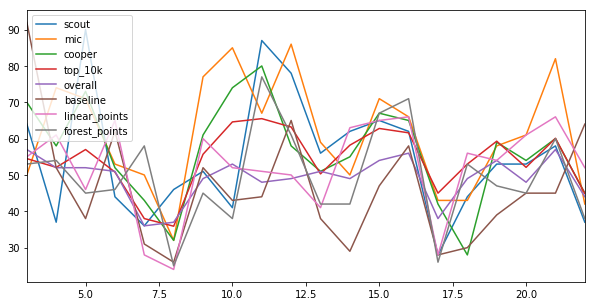

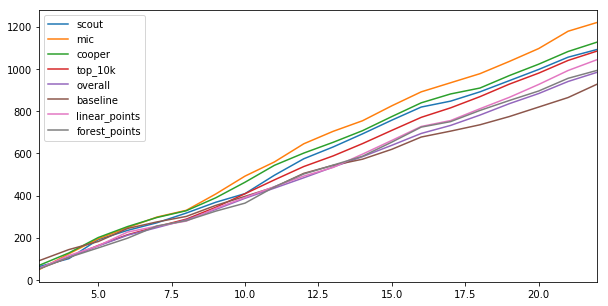

In [273]:
team_points.loc[3:].plot(figsize=(10,5))
team_points.loc[3:].cumsum().plot(figsize=(10,5))
team_points.loc[3:].sum()

In [274]:
print('how many times were bench points not added: ', number_of_alerts)

how many times were bench points not added:  40
